In [1]:
import os
import cv2
import redis
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from GA_keras import GA, ga_main

Using TensorFlow backend.


In [2]:
# open redis server and config the maximum memory available
import importlib
spec = importlib.util.spec_from_file_location("configRedis", "../configRedis.py")   

configRedis = importlib.util.module_from_spec(spec)       
spec.loader.exec_module(configRedis)
configRedis.config()

Configured


In [3]:
# load model

model = keras.models.load_model('../external_models/alexnet-cifar10_origin.h5')
new_output = keras.layers.Softmax()(keras.layers.Dense(10, name="dense_3")(model.layers[-2].output)) # without specifying activation 
new_model = keras.models.Model(input=model.input, output=new_output)
new_model.layers[-2].set_weights(model.layers[-1].get_weights())
model = new_model

# model = keras.applications.ResNet50()
# new_output = keras.layers.Softmax()(keras.layers.Dense(1000)(model.layers[-2].output)) # without specifying activation 
# new_model = keras.models.Model(input=model.input, output=new_output)
# new_model.layers[-2].set_weights(model.layers[-1].get_weights())
# model = new_model

# model = keras.applications.MobileNetV2()
# new_output = keras.layers.Softmax()(keras.layers.Dense(1000)(model.layers[-2].output)) # without specifying activation 
# new_model = keras.models.Model(input=model.input, output=new_output)
# new_model.layers[-2].set_weights(model.layers[-1].get_weights())
# model = new_model

# model = keras.applications.VGG16()
# new_output = keras.layers.Softmax()(keras.layers.Dense(1000)(model.layers[-2].output)) # without specifying activation 
# new_model = keras.models.Model(input=model.input, output=new_output)
# new_model.layers[-2].set_weights(model.layers[-1].get_weights())
# model = new_model

/data/yylaiai/anaconda3/envs/audee_test/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/data/yylaiai/anaconda3/envs/audee_test/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("so...)`
  """


In [4]:
# load inputs
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# expand cifar10 images from 32x32 to 224x224
x_test_224 = np.array([cv2.resize(i, (224, 224)) for i in x_test])
print(x_test_224.shape)

(10000, 224, 224, 3)


### Mutate for triggering NaN inconsistency

In [5]:
mut_level = 'i+w'
model = model
x = x_test[0]/255
input_scale = 255 # image scale
init_noise = 0 # scale of Cauchy noise added in initialization
r1 = 0.5 # crossover rate
r2 = 0.3 # mutation rate
r3 = 10 # mutation scale (larger scale can trigger NaN inconsistency easier, smaller scale can increase layer distance easier)
m = 3 # top m chromosomes selected
n = 6 # population size
layer_idx = -2 # index of layer used in calculation of fitness values
db_flag = 2
maxIter = 10
dynamicWeightMutDecay = np.inf

r = redis.Redis(db=db_flag)
r.flushdb()

fit = ['inc', ['tensorflow', 'theano']]

In [6]:
ga = GA(fit, mut_level, model, x, input_scale, db_flag)
ga.initPopulation(init_noise, n)
ga.initDynamicWeightMutation(r3)

[[3072, 3072, 10],
 [3072, 5760, 10],
 [5760, 5760, 10],
 [5760, 6144, 0],
 [6144, 620800, 10],
 [620800, 620800, 10],
 [620800, 621824, 0],
 [621824, 1506944, 10],
 [1506944, 2834432, 10],
 [2834432, 3719424, 10],
 [3719424, 3719424, 10],
 [3719424, 3720448, 0],
 [3720448, 3720448, 10],
 [3720448, 4773120, 10],
 [4773120, 4773120, 10],
 [4773120, 21554432, 10],
 [21554432, 21554432, 10],
 [21554432, 21595402, 10],
 [21595402, 21595402, 10]]

In [7]:
ga = ga_main(fit, mut_level, model, x, input_scale, init_noise, r1, r2, r3, m, n, layer_idx, db_flag, maxIter, dynamicWeightMutDecay, ga)

Continuing from the previous populations...

Running at iteration 1:
Average fitness value: 170.12336425781248
Time taken: 107.96673655509949

Running at iteration 2:
Average fitness value: 6.515937737118013e+34
Time taken: 108.51707410812378

Running at iteration 3:
Average fitness value: nan
Time taken: 108.40019679069519

Running at iteration 4:
Average fitness value: nan
Time taken: 106.58743739128113

Running at iteration 5:
Average fitness value: nan
Time taken: 101.56756043434143

Running at iteration 6:
Average fitness value: nan
Time taken: 110.11721754074097

Running at iteration 7:
Average fitness value: nan
Time taken: 100.45758867263794

Running at iteration 8:
Average fitness value: nan
Time taken: 98.10911345481873

Running at iteration 9:
Average fitness value: nan
Time taken: 106.62056636810303

Running at iteration 10:
Average fitness value: nan
Time taken: 99.49222826957703


Total time taken: 1047.8414690494537


In [8]:
ga.F

[[[['nan', 'tensorflow', [18]], ['nan', 'theano', [18]]],
  array([ 0.61960784,  0.        ,  0.19215686, ..., -0.03412968,
          2.39847667, -0.01825427])],
 [[['nan', 'tensorflow', [18]], ['nan', 'theano', [18]]],
  array([ 0.61960784,  0.        ,  0.19215686, ..., -0.03412968,
         -0.02668719, -0.01825427])],
 [[['nan', 'tensorflow', [18]], ['nan', 'theano', [18]]],
  array([ 0.        ,  0.        ,  0.19215686, ..., -0.03412968,
         -0.02668719, -0.01825427])],
 [[['nan', 'tensorflow', [18]], ['nan', 'theano', [18]]],
  array([ 0.61960784,  0.        ,  0.19215686, ..., -0.03412968,
          2.39847667, -0.01825427])],
 [[['nan', 'tensorflow', [18]], ['nan', 'theano', [18]]],
  array([ 0.        ,  0.        ,  0.19215686, ..., -0.03412968,
         -0.02668719, -0.01825427])],
 [[['nan', 'tensorflow', [17, 18]], ['nan', 'theano', [17, 18]]],
  array([ 0.        ,  0.43921569,  0.19215686, ..., -0.03412968,
          0.85966283, 12.10317541])],
 [[['nan', 'tensorfl

### Mutate for triggering high inconsistency fitness values

In [9]:
mut_level = 'i+w'
model = model
x = x_test[0]/255
input_scale = 255 # image scale
init_noise = 0 # scale of Cauchy noise added in initialization
r1 = 0.5 # crossover rate
r2 = 0.3 # mutation rate
r3 = 0.1 # mutation scale (larger scale can trigger NaN inconsistency easier, smaller scale can increase layer distance easier)
m = 3 # top m chromosomes selected
n = 6 # population size
layer_idx = -2 # index of layer used in calculation of fitness values
db_flag = 2
maxIter = 10
dynamicWeightMutDecay = np.inf

r = redis.Redis(db=db_flag)
r.flushdb()

fit = ['inc', ['tensorflow', 'theano']]

In [10]:
ga = GA(fit, mut_level, model, x, input_scale, db_flag)
ga.initPopulation(init_noise, n)
ga.initDynamicWeightMutation(r3)

[[3072, 3072, 0.1],
 [3072, 5760, 0.1],
 [5760, 5760, 0.1],
 [5760, 6144, 0],
 [6144, 620800, 0.1],
 [620800, 620800, 0.1],
 [620800, 621824, 0],
 [621824, 1506944, 0.1],
 [1506944, 2834432, 0.1],
 [2834432, 3719424, 0.1],
 [3719424, 3719424, 0.1],
 [3719424, 3720448, 0],
 [3720448, 3720448, 0.1],
 [3720448, 4773120, 0.1],
 [4773120, 4773120, 0.1],
 [4773120, 21554432, 0.1],
 [21554432, 21554432, 0.1],
 [21554432, 21595402, 0.1],
 [21595402, 21595402, 0.1]]

In [11]:
ga = ga_main(fit, mut_level, model, x, input_scale, init_noise, r1, r2, r3, m, n, layer_idx, db_flag, maxIter, dynamicWeightMutDecay, ga)

Continuing from the previous populations...

Running at iteration 1:
Average fitness value: 170.12336425781248
Time taken: 111.24147939682007

Running at iteration 2:
Average fitness value: 1.2951781779161647e+20
Time taken: 108.80623149871826

Running at iteration 3:
Average fitness value: 2.03188195792413e+22
Time taken: 98.05892086029053

Running at iteration 4:
Average fitness value: 1.4882024092031808e+23
Time taken: 98.13507127761841

Running at iteration 5:
Average fitness value: 2.652214981454588e+24
Time taken: 103.15475583076477

Running at iteration 6:
Average fitness value: 5.853570136079195e+24
Time taken: 108.68852400779724

Running at iteration 7:
Average fitness value: 1.193670777317413e+25
Time taken: 95.33150029182434

Running at iteration 8:
Average fitness value: 6.253587250973694e+25
Time taken: 99.20888686180115

Running at iteration 9:
Average fitness value: 3.471651083337956e+26
Time taken: 104.00782585144043

Running at iteration 10:
Average fitness value: 7.11

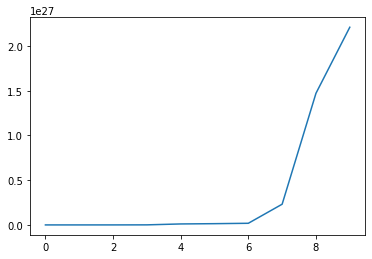

In [12]:
plt.plot(np.max(np.nan_to_num(ga.fit_hist, -1), axis=1))

In [13]:
ga.fit_hist

[array([170.12336426, 170.12336426, 170.12336426, 170.12336426,
        170.12336426, 170.12336426]),
 array([1.70123364e+02, 1.70123364e+02, 1.70123364e+02, 7.39243699e+20,
        1.57587583e+19, 2.21044498e+19]),
 array([1.57587583e+19, 2.21044498e+19, 7.39243699e+20, 9.75700896e+21,
        1.06673169e+23, 4.70563291e+21]),
 array([4.70563291e+21, 9.75700896e+21, 1.06673169e+23, 6.91570511e+23,
        5.94300627e+22, 2.07850616e+22]),
 array([5.94300627e+22, 1.06673169e+23, 6.91570511e+23, 1.08502181e+25,
        4.10038286e+24, 1.05015224e+23]),
 array([6.91570511e+23, 4.10038286e+24, 1.08502181e+25, 1.39699932e+25,
        2.28955845e+24, 3.21969771e+24]),
 array([4.10038286e+24, 1.08502181e+25, 1.39699932e+25, 1.54988658e+25,
        1.82773292e+25, 8.92345749e+24]),
 array([1.39699932e+25, 1.82773292e+25, 1.54988658e+25, 2.31647424e+26,
        4.83165459e+25, 4.75050773e+25]),
 array([4.75050773e+25, 4.83165385e+25, 2.31647424e+26, 1.04033505e+26,
        1.47198182e+27, 1.79